In [51]:
from PIL import Image
import numpy as np
import os
import matplotlib.pyplot as plt
import pathlib
import pandas as pd

faces_X_train = pathlib.Path('./dataset/train/faces/')
faces_y_train = pathlib.Path('./dataset/train/train_faces.csv')
landmarks_X_train = pathlib.Path('./dataset/train/landmarks')
landmarks_y_train = pathlib.Path('./dataset/train/train_landmarks.csv')

In [59]:
def Solve_Image(img_path, face = True, save_img = False, output_path = os.getcwd()):
    
    '''
    Splits the image into parts and arranges them according to the coordinates given from the dataframe.
    
    : Parameters
    - img_path: Image path. os.path object expected.
    - face: True if face image else False Default True.
    -
    '''
    
    
    if not os.path.exists(img_path):
        print("Plase Provide a valid image path.")
        return
    if face:
        df = pd.read_csv(faces_y_train, dtype = dict((str(i)+str(j), str) for j in range(6) for i in range(6)))
        df.index = df['image']
        df = df.drop(columns = ['image'])
    else:
        df = pd.read_csv(landmarks_y_train, dtype = dict((str(i)+str(j), str) for j in range(6) for i in range(6)))
        df.index = df['image']
        df = df.drop(columns = ['image'])
        
        
    img_name = os.path.split(img_path)[-1]
    
    if not img_name:
        print("Expected an image path.")
        return
    
    if img_name not in df.index:
        print("Expected an Image with labels Present.")
        return 
    
    img = np.asarray(Image.open(img_path))
    new_img = np.zeros_like(img)
    part = img.shape[0]//6
    
    for i in range(6):
        for j in range(6):
            r, c = int(df.loc[img_name, str(i)+str(j)][0]), int(df.loc[img_name, str(i)+str(j)][1])
            new_img[r*part:(r+1)*part, c*part:(c+1)*part] = img[i*part:(i+1)*part, j*part:(j+1)*part]
    if save_img:       
        new_img = Image.fromarray(new_img)
        new_img.save(os.path.join(output_path, img_name))
        print(f"Combining Done! Image saved at {os.path.join(output_path, img_name)}")
    plt.imshow(new_img)
    plt.show()
    

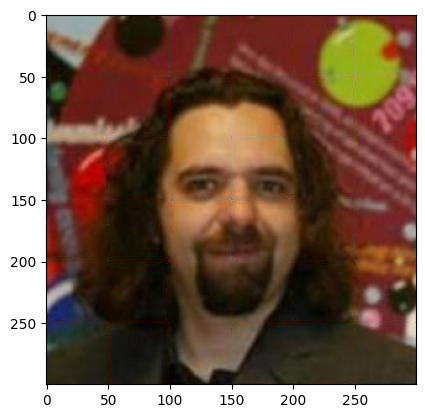

In [60]:
Solve_Image('./dataset/train/faces/024XOWrOBS.jpg', save_img = False)

In [26]:
# Original Implementation.
# Less Efficient.


def preparing_dirs(spliting_images_dir, combined_images_dir):
    if not os.path.exists(spliting_images_dir):
        os.makedirs(spliting_images_dir)
    if not os.path.exists(combined_images_dir):
        os.makedirs(combined_images_dir)

def split_image(shuffle_dict, img_name, img_path):
    spliting_images_dir = 'split_images'
    combined_images_dir = 'combined_images'
    img = np.asarray(Image.open(os.path.join(img_path, img_name)))
    row = 0
    for i in range(0, img.shape[0], img.shape[0]//6):
        col = 0
        for j in range(0, img.shape[1], img.shape[1]//6):
            img_crop = Image.fromarray(img[i:i+img.shape[0]//6, j:j+img.shape[1]//6])
            if not os.path.exists(f'{spliting_images_dir}/{img_name[:-4]}'):
                os.makedirs(f'{spliting_images_dir}/{img_name[:-4]}')
            img_crop.save(f'{spliting_images_dir}/{img_name[:-4]}/{img_name[:-4]}_{shuffle_dict[str(str(row)+str(col))]}.jpg')
            col += 1
        row += 1
    print("Splitting Done!")

def combine_image(img_name, img_dir, img_path, output_path, plot = True, save_img = True):
    spliting_images_dir = 'split_images'
    combined_images_dir = 'combined_images'
    img = Image.open(os.path.join(img_path, img_name))
    images = os.listdir(os.path.join(img_dir, img_name[:-4]))
    new_img = np.array(Image.new('RGB', img.size, (255, 255, 255)))
    c = 0
    row = 0
    for i in range(0, new_img.shape[0], new_img.shape[0]//6):
        col = 0
        for j in range(0, new_img.shape[1], new_img.shape[1]//6):
            new_img[i:i+new_img.shape[0]//6, j:j+new_img.shape[1]//6] = np.array(Image.open(f'./{spliting_images_dir}/{img_name[:-4]}/{images[c]}'))
            col += 1
            c += 1
        row += 1
    if save_img:
        new_img = Image.fromarray(new_img)
        new_img.save(output_path)
        print(f"Combining Done! Image saved at {output_path}")
    if plot:
        plt.imshow(new_img)
        plt.show()
    
def clearing_dirs(spliting_images_dir):
    img_name = os.listdir(spliting_images_dir)[0]
    imgs = os.listdir(os.path.join(spliting_images_dir, img_name))
    for img in imgs:
        os.remove(os.path.join(spliting_images_dir, img_name, img))
    print("Cleared Directories!!!")
    
img_name = '0IbMAEj3Mc.jpg'
img_dir = f'./split_images'
img_path = './Images/'

spliting_images_dir = 'split_images'
combined_images_dir = 'combined_images'

# Preparing cache dirs.
preparing_dirs(spliting_images_dir, combined_images_dir)

# Plotting the original Image.
plt.imshow(os.path.join())

# Spliting Image.
split_image(shuffle_dict, img_name, img_path)

# Combining Image.
combine_image(img_name, img_dir, img_path, os.path.join(combined_images_dir, img_name))

# Clearing Cache dirs.
clearing_dirs(spliting_images_dir)